# Math 440 Final Project
Regression analysis

This notebook contains code implementation and answers for the final project of MATH 440 Regression analysis course. The main purpose is to construct and analyse the a linear regression model on a designated dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
import sklearn.metrics
import scipy.stats as stats
import statsmodels.api as sm
import pylab
import scipy.stats as stats

In [2]:
loc = "C:/Users\Arthur\Desktop\Study\Fall2022\Regression Analysis\data23.txt"
with open(loc, "r") as f:
    records = f.readlines()
data = [line.split() for line in records]
for i in range(len(data)):
    data[i] = [float(x) for x in data[i]]
data = np.array(data)
data = pd.DataFrame(data)
data
data.columns = range(1, 15)

In [3]:
def lay_low(data):
    tp = dict()
    arr = np.array(data[14][range(1,14)])
    for i in range(1, 14):
        tp[str(i)] = [arr[i-1]]
    tp = pd.DataFrame(tp)
    tp.add_prefix("X")
    return tp

## task 1: covariance and correlation of $(X_i, Y)$

In [4]:
data_cov = data.cov()
lay_low(data_cov)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,98.682002,91.311316,297.104863,-18.17601,7.742981,92.481394,-179.303895,-34.763279,-345.528379,72.841678,-360.15215,-149.60167,295.141149


In [5]:
data_corr = data.corr()
lay_low(data_corr)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.166054,0.171595,0.483048,-0.031597,0.014599,0.154374,-0.305835,-0.067215,-0.600967,0.128996,-0.683427,-0.297202,0.524442


## task 2: Absolute correlation

In [6]:
data_abs_corr = np.abs(data.corr())
lay_low(data_abs_corr)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.166054,0.171595,0.483048,0.031597,0.014599,0.154374,0.305835,0.067215,0.600967,0.128996,0.683427,0.297202,0.524442


## Question 1: Based only on the latter correlation, can you list all variables that is relevant for prediction?

The bigger the absolute value of correlation between some variable and the target, the more relevant said variable is for prediction. Formally, using a Pearsosn's correlation coefficient test at $0.05$ significance level for $298$ df we fail to reject $H_0$ for the following variables: $X_1, X_2, X_3, X_6, X_7, X_9, X_{10} X_{11}, X_{12}, X_{13}$

However, correlation alone may not give a conclusive result. Additional t-test is required.

## task 4: Correlation of variables

In [7]:
data[range(1, 14)].corr()

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,1.000000,0.905987,-0.058061,-0.109712,0.019934,0.014084,-0.051011,-0.113958,0.034869,0.014837,0.002802,-0.019820,-0.041378
2,0.905987,1.000000,-0.046611,-0.079669,0.015120,0.014146,-0.069957,-0.080885,0.045840,0.014604,0.029814,-0.023321,-0.024881
3,-0.058061,-0.046611,1.000000,0.021284,-0.004270,0.080113,0.032160,0.041422,0.078583,0.079103,0.065475,0.068031,0.922672
4,-0.109712,-0.079669,0.021284,1.000000,0.050188,0.013692,-0.002636,0.873203,-0.055007,0.011252,-0.039329,-0.025904,0.040678
5,0.019934,0.015120,-0.004270,0.050188,1.000000,-0.094048,-0.015061,0.092392,-0.016667,-0.109689,-0.035225,-0.038398,-0.014749
6,0.014084,0.014146,0.080113,0.013692,-0.094048,1.000000,-0.048396,-0.019820,0.084874,0.901242,0.019025,-0.047975,0.090291
7,-0.051011,-0.069957,0.032160,-0.002636,-0.015061,-0.048396,1.000000,-0.003091,-0.036833,-0.049833,-0.043925,0.909320,0.015141
8,-0.113958,-0.080885,0.041422,0.873203,0.092392,-0.019820,-0.003091,1.000000,-0.020271,-0.015499,0.001804,-0.013416,0.065309
9,0.034869,0.045840,0.078583,-0.055007,-0.016667,0.084874,-0.036833,-0.020271,1.000000,0.113340,0.892367,-0.023828,0.077312
10,0.014837,0.014604,0.079103,0.011252,-0.109689,0.901242,-0.049833,-0.015499,0.113340,1.000000,0.060328,-0.058558,0.078184


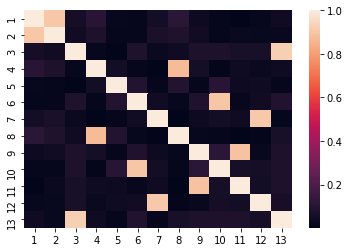

In [8]:
sns.heatmap(data[range(1, 14)].corr().abs())
plt.show()

## Question 2: What conclusion can you make about the structure of your predictors after analysis of correlation matrix?

As the heatmap suggests, some pairs of variables have high correlation: $(X_{1}, X_{2})$, $(X_{3}, X_{13})$, $(X_{4}, X_{8})$, $(X_{6}, X_{10})$, $(X_{7}, X_{12})$, $(X_{9}, X_{11})$. This implies the variance of the weight vector will be large, and eliminating/combining variables inside pairs could improve the model.

## task 6: Scikit-learn code for least square estimation

In [9]:
X = np.array(data[range(1, 14)])
Y = np.array(data[14]).reshape((-1, 1))

In [10]:
lsr = LinearRegression()
lsr.fit(X, Y)

LinearRegression()

## task 7: Obtain weights

In [11]:
b0, b1= lsr.intercept_, lsr.coef_

In [12]:
b = np.c_[b0, b1][0]
b

array([ 9.98106948e+00,  4.20771974e-03,  9.95029165e-01,  8.47046231e-04,
       -2.33092728e-04, -1.55855445e-03,  3.33720593e-03, -2.69419679e-03,
       -4.99755140e-01,  2.96609913e-03,  4.95716640e-01, -4.00404989e+00,
       -1.99602979e+00,  2.99963167e+00])

## task 8: Estimate variance of noise $\epsilon$

In [13]:
mse = sklearn.metrics.mean_squared_error(Y, lsr.predict(X))
mse

0.057621145562278465

## task 9: t-values of non-target variables

In [14]:
XTX1 = np.linalg.inv((X.T@X))
ts = b1[0]/(np.sqrt(XTX1.diagonal())*np.sqrt(mse))
t_abs = np.abs(ts)
t_abs

array([1.43144260e+00, 3.03307115e+02, 2.72033313e-01, 8.86088072e-02,
       1.11156904e+00, 1.17324997e+00, 8.79164092e-01, 1.70029783e+02,
       1.02746101e+00, 1.64307235e+02, 1.26872044e+03, 5.58483668e+02,
       8.78101625e+02])

## task 10: Based on the value of $t_i$ find all your variables that is relevant for prediction.

In [15]:
t_stat = t_abs
dof = 285
2*(1 - stats.t.cdf(abs(t_stat), dof))

array([0.15339908, 0.        , 0.78579337, 0.92945504, 0.26726031,
       0.24167518, 0.38005296, 0.        , 0.30507466, 0.        ,
       0.        , 0.        , 0.        ])

All variables with high absolute $t$ value can be considered relevant for the prediction. Formally, at $\alpha = 0.1$ significance level, we reject $H_0$ for variables with $p$-values less than $0.05$: $X_2, X_8, X_{10}, X_{11}, X_{12}, X_{13}$ (test 8.5.1 from the textbook).
So far we rejected insignificance ($H_0$) in either of tests for the following variables: $X_1, X_2, X_3, X_6, X_7, X_8, X_9, X_{10} X_{11}, X_{12}, X_{13}$.

## Question 3: List variables that can be discarded.

By eliminating pairs of highly correlated variables (and possibly prioritizing those variables which passed both tests), we may leave $X_2, X_8, X_{10}, X_{11}, X_{12}, X_{13}$. Thus the list of discarded variables is: $X_1, X_3, X_4, X_5, X_6, X_7, X_9$

## task 12: Calculate residuals and draw Q-Q plot

In [16]:
res = Y - lsr.predict(X)

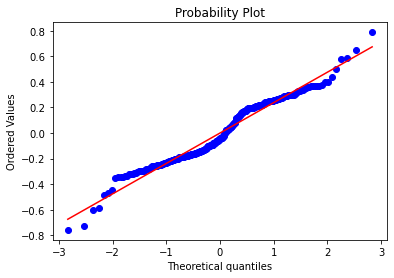

In [17]:
stats.probplot(res.reshape(1, 300)[0], dist="norm", plot=pylab)
pylab.show()

## Question 4: Is an error normally distributed, yes or no?

Based on the Q-Q plot, residuals are distributed very close to the normal distribution. However, regular deviations (repeated up- and down-skewed parts) suggest that error is not normally distributed.

## task 14: Draw a plot "residuals against $\hat{Y}$".

In [18]:
res_data = pd.DataFrame()
res_data["res"] = (res.reshape(1, 300)[0])
Y_hat = lsr.predict(X)
res_data["Y_hat"] = Y_hat.reshape(1, 300)[0]

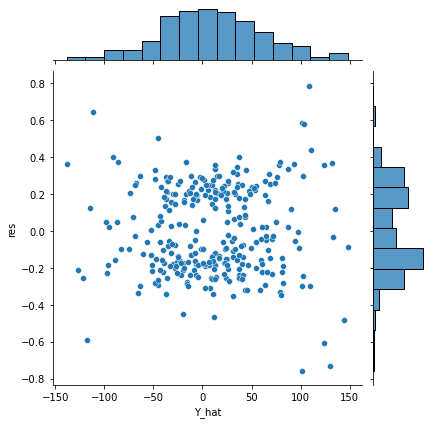

In [19]:
sns.jointplot(data = res_data, x = "Y_hat", y = "res")
plt.show()

## Question 5: If your error is not normal, what would you assume about the real distribution of an error?

Based on Q-Q and "residue vs. $\hat{Y}$" plots, the error might come from some **bi-modal** or **heavy-tailed** distribution. A srtong indicator of that is presence of two peaks on the histogram of "residue" axis.

## task 16: $R^2$

In [20]:
lsr.score(X, Y)

0.9999791347054694

## Question 6: Did linear regression model solve the prediction problem or not?

Low Mean-Squared-Error and high coefficient of determination suggest that linear regression model is a successful predictor of target variable.